
# Project: No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description 

- A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela

- 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

## Data Dictionary
- ### PatientId <br>
    Identification of a patient
- ### AppointmentID <br>
    Identification of each appointment
- ### Gender <br>
    Male or Female . Female is the greater proportion
- ### DataMarcacaoConsulta <br>
    The day of the actuall appointment, when they have to visit the doctor.
- ### DataAgendamento <br>
    The day someone called or registered the appointment, this is before appointment of course.
- ### Age <br>
    How old is the patient.
- ### Neighbourhood  <br>
    Where the appointment takes place.
- ### Scholarship  <br>
    True of False
- ### Hipertension  <br>
    True or False
- ### Diabetes  <br>
    True or False
- ### Alcoholism  <br>
    True or False
- ### Handcap <br>
    True or False
- ### SMS_received  <br>
    1 or more messages sent to the patient.
- ### No-show  <br>
    True or False.

<ul>  <h2>Question(s) for Analysis </h2>
        <li> <h3>Does the gender affects the attendance of the appointment ? </h3> </li>
        <li> <h3>Does people more than 40 showed for the appointments  more ? </h3> </li>
        <li> <h3> The most frequent neighboorhood patients showed for their appointements in and the least one . </h3> </li>
        <li> <h3>Which disease their patient shows the most or affected on patient's to attend the appointment ? </h3> </li>
        <li> <h3> Does SMS messages affected their attendance ? </h3> </li>
</ul>


In [81]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
 **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**
 ##  steps :

 - import data
 - check data types 
 - viewing some summary statistics
- check for missing values
- check for duplicates
- drop missing values and duplicates if not necessary
  



In [82]:
# importing all packages we wil use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme()

data = pd.read_csv('noshowappointments.csv')

In [83]:
data.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [85]:
data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

seems like our data is great , no missing data !

### It seems that the Average number of people that registered for an appointment is around 30 ~ 40 <br>
but age may have some negative values 

In [86]:
# check for duplicates 
data.duplicated().sum()

0

In [87]:
#check for missing values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Great! there is no dplicates in our data


### Data Cleaning

### *notes on data* :
1. convert the data types of **PatientId** and **AppointmentID** to strings<br>
2. Clean ages with negative values.<br>
3.  <b>'No-show'</b>  to <b>'no_show'</b> as it's easier .

#### 1-  change  data types of (patientID & AppointmentID) >  strings

In [88]:
data['PatientId'] = data['PatientId'].astype(str)
data['AppointmentID'] = data['AppointmentID'].astype(str)

In [89]:
#making sure they have been changed before
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 8.9+ MB


removing age negative value

In [90]:
data.drop(99832, axis=0, inplace=True)

In [91]:
data.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [92]:
#renaming column > 'No-show
data.rename(columns={"No-show" : "no_show"}, inplace=True)
data.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### seems like no there is no negative values

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Does the gender affects the attendance of the appointment ?

In [93]:
#splitting data with gender and show for easier analysis
f = data[data['Gender'] == 'F'].loc[:,{'Gender' , 'no_show'}]
m = data[data['Gender'] == 'M'].loc[:,{'Gender' , 'no_show'}]

print(f.head(2))
print(m.head(2))

  no_show Gender
0      No      F
2      No      F
   no_show Gender
1       No      M
11     Yes      M


In [94]:
f['no_show'].value_counts()

No     57245
Yes    14594
Name: no_show, dtype: int64

Seems like females have high ability to adapt to the appointment time

Text(0.5, 0, 'Value counts for Gender ')

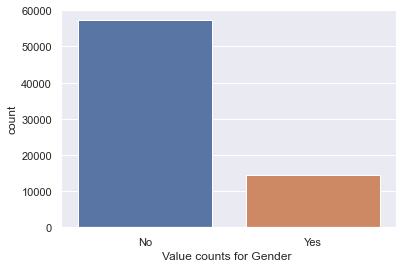

In [95]:
ax = sns.countplot(x="no_show", data=f)
plt.xlabel('Value counts for Gender ')

### Research Question 2  Does people more than 40 showed for the appointments  more ?

In [96]:
greaterthan40 = data[data['Age'] >= 40]
greaterthan40

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274.0,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110520,996997666245785.0,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,36355337746436.0,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2572134369293.0,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No


In [97]:
greaterthan40['no_show'].value_counts()

No     42347
Yes     8898
Name: no_show, dtype: int64

Text(0.5, 0, 'Value counts for Age ')

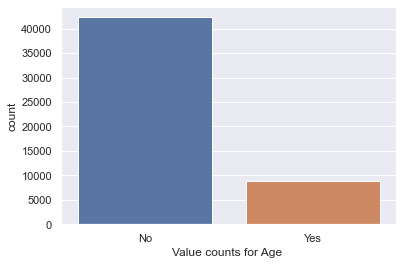

In [98]:
ax = sns.countplot(x="no_show", data=greaterthan40)
plt.xlabel('Value counts for Age ')

### seems that people greater than 40 year have high ablitiy to show up for their appointments

### Research Question 3     The most frequent neighboorhood patients showed for their appointements in and the least one . 

In [99]:
# the place where most of their appointments pattients showed up 
data['Neighbourhood'][data['no_show'] == 'Yes'].mode()

0    JARDIM CAMBURI
dtype: object

In [100]:
# the place where most of their appointments pattients didn't showed up 
data['Neighbourhood'][data['no_show'] == 'No'].mode()

0    JARDIM CAMBURI
dtype: object

Neighbourhood with the biggest no show patients is :  JARDIM CAMBURI

### Research Question 4 Which disease their patient shows the most or affected on patient's to attend the appointment ?

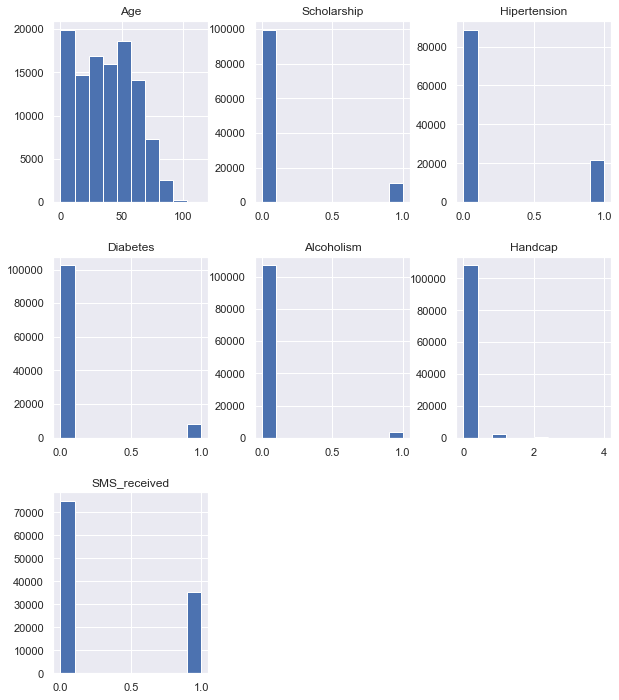

In [116]:
data.hist(figsize=(10,12));

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='Age'>,
        <AxesSubplot:xlabel='Hipertension', ylabel='Age'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='Age'>,
        <AxesSubplot:xlabel='Alcoholism', ylabel='Age'>,
        <AxesSubplot:xlabel='Handcap', ylabel='Age'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Hipertension', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Alcoholism', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Handcap', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='Scholarship'>],
       [<AxesSubplot:xlabel='Age', ylabel='Hipertension'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='Hipertension'>,
        <AxesSubplot:xlabel='Hip

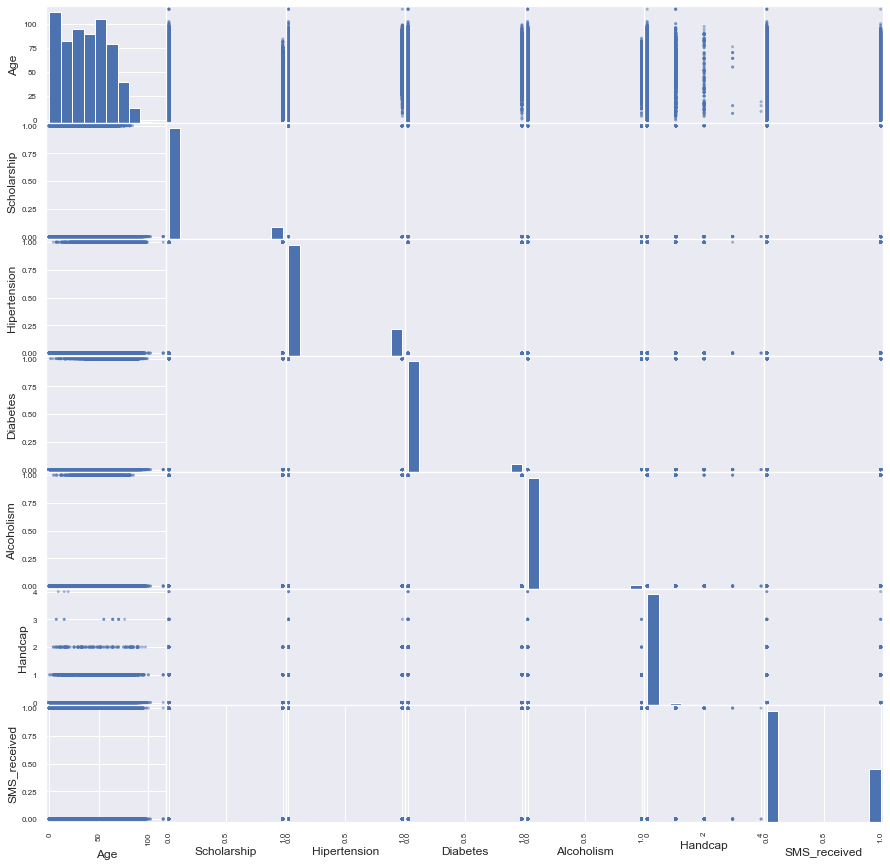

In [111]:
pd.plotting.scatter_matrix(data , figsize=(15,15))

<AxesSubplot:>

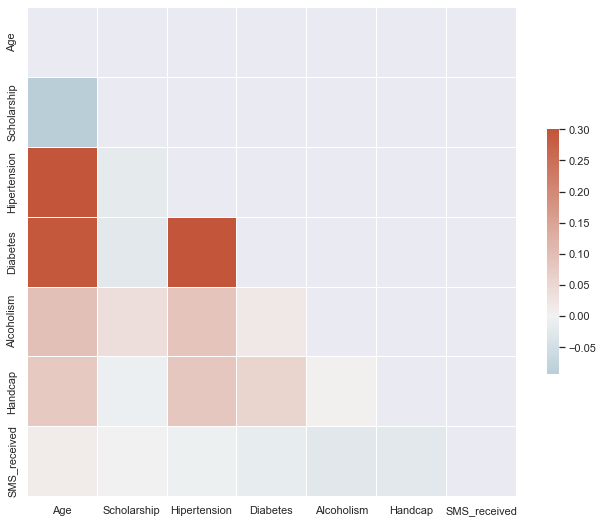

In [107]:
# Compute the correlation matrix
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Research Question 5    Does SMS messages affected their attendance ?

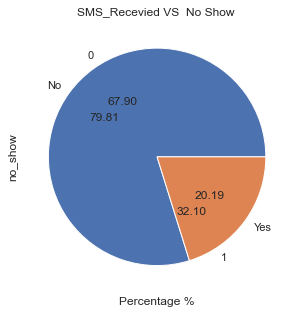

In [120]:
data['SMS_received'].value_counts().plot(figsize=(5,5),kind='pie',autopct='%.2f');
data['no_show'].value_counts().plot(figsize=(5,5),kind='pie',autopct='%.2f');
plt.xlabel('Percentage %');
plt.title('SMS_Recevied VS  No Show ');

However 67.90 % didn't recieve SMS 
 they showed up appointment

<a id='conclusions'></a>
## Conclusions
My Analysis indicated that patients who did not have any of the illnesses included in the dataset had greater no-show rates than those who did. As a result, it makes little difference whatever ailment (hypertension, diabetes, alcoholism, or disability) the patient has.

Furthermore, we discovered significant variations in the proportions of no-shows between communities. We've seen areas where one out of every four to five appointments is a no-show.

Finally, and perhaps most unexpectedly, for the appointments in this dataset, an SMS informing patients of their forthcoming visit made things worse.


### Limitations
most of data is categorical it can't show strong correlation
